<a href="https://colab.research.google.com/github/brainmentorspvtltd/MSIT_FDP_DeepLearning/blob/main/CovidXRayClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
os.environ["KAGGLE_USERNAME"] = "brainmentors"
os.environ["KAGGLE_KEY"] = "b7925f4d0b2d5b76eba73c489d266931"

!kaggle datasets download tawsifurrahman/covid19-radiography-database

100% 744M/745M [00:18<00:00, 36.5MB/s]
100% 745M/745M [00:18<00:00, 41.4MB/s]


In [ ]:
!unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6710.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6719.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-672.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6720.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6721.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6722.png  
  inflating:

In [ ]:
len(os.listdir("COVID-19_Radiography_Dataset/COVID"))

3616

In [ ]:
len(os.listdir("COVID-19_Radiography_Dataset/Normal"))

10192

In [ ]:
len(os.listdir("COVID-19_Radiography_Dataset/Viral Pneumonia"))

1345

In [ ]:
import cv2

In [ ]:
normal = cv2.imread("COVID-19_Radiography_Dataset/Normal/Normal-10.png")

In [ ]:
import matplotlib.pyplot as plt

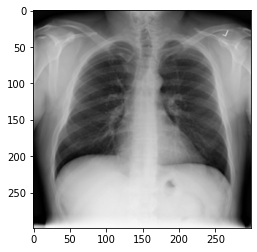

In [ ]:
plt.imshow(normal)

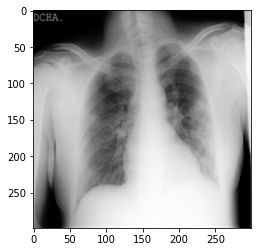

In [ ]:
covid = cv2.imread("COVID-19_Radiography_Dataset/COVID/COVID-100.png")
plt.imshow(covid)

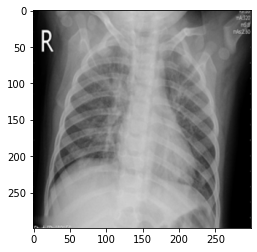

In [ ]:
penumonia = cv2.imread("COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1.png")
plt.imshow(penumonia)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

In [ ]:
df.shape

(3616, 4)

In [ ]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [ ]:
df['URL'][0]

'https://sirm.org/category/senza-categoria/covid-19/'

In [ ]:
import glob

In [ ]:
covid_images_urls = glob.glob("COVID-19_Radiography_Dataset/COVID/*.png")

In [ ]:
len(covid_images_urls)

3616

In [ ]:
covid_images_urls[0]

'COVID-19_Radiography_Dataset/COVID/COVID-1806.png'

In [ ]:
normal_images_url = glob.glob("COVID-19_Radiography_Dataset/Normal/*.png")

In [ ]:
len(normal_images_url)

10192

In [ ]:
normal_images_url = normal_images_url[:4000]

In [ ]:
len(normal_images_url)

4000

In [ ]:
def load_data(urls,lab):
  features = []
  labels = []
  for i in range(len(urls)):
    img = cv2.imread(urls[i])
    img = cv2.resize(img, (224,224)) 
    # because we are applying VGG19, and it takes input in 224,224 dimension
    features.append(img)
    labels.append(lab)
  return features, labels

In [ ]:
normal_images, normal_labels = load_data(normal_images_url,0)

In [ ]:
covid_images, covid_labels = load_data(covid_images_urls,1)

In [ ]:
# normal_images[0]

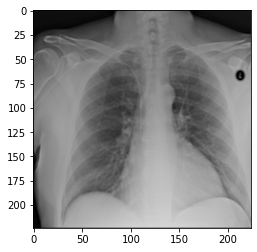

In [ ]:
plt.imshow(normal_images[0])

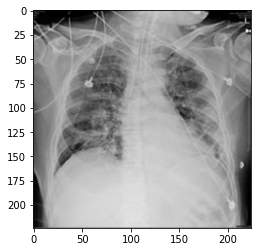

In [ ]:
plt.imshow(covid_images[0])

In [ ]:
normal_images.extend(covid_images)

In [ ]:
normal_labels.extend(covid_labels)

In [ ]:
len(normal_images)

7616

In [ ]:
len(normal_labels)

7616

In [ ]:
images = normal_images
labels = normal_labels

In [ ]:
import numpy as np

In [ ]:
images = np.asarray(images)
labels = np.asarray(labels)

In [ ]:
images.shape

(7616, 224, 224, 3)

In [ ]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([4000, 3616]))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.25)

In [ ]:
x_train.shape

(5712, 224, 224, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.applications import VGG19

In [ ]:
model = VGG19()

574726144/574710816 [==============================] - 7s 0us/step


In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
x = model.output
x = Dense(1024, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

In [ ]:
model = Model(inputs = model.input, outputs = output)

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
179/179 [==============================] - 216s 1s/step - loss: 0.6931 - accuracy: 0.5189 - val_loss: 0.6939 - val_accuracy: 0.4722
Epoch 2/5
179/179 [==============================] - 184s 1s/step - loss: 0.6932 - accuracy: 0.5205 - val_loss: 0.6916 - val_accuracy: 0.5278
Epoch 3/5
179/179 [==============================] - 184s 1s/step - loss: 0.6924 - accuracy: 0.5243 - val_loss: 0.6924 - val_accuracy: 0.5278
Epoch 4/5
179/179 [==============================] - 184s 1s/step - loss: 0.6924 - accuracy: 0.5243 - val_loss: 0.6931 - val_accuracy: 0.5278
Epoch 5/5
179/179 [==============================] - 184s 1s/step - loss: 0.6922 - accuracy: 0.5177 - val_loss: 0.6925 - val_accuracy: 0.5278
